# Introducción al análisis de fútbol con datos de seguimiento en python (Parte 1)

El libro tiene como objetivo mostrar un ejemplo básico de uso de python para el análisis de datos en el fútbol. 

**Autor del libro:** Jorge Mendoza  [[@AIJorgeMendoza]](https://twitter.com/AIJorgeMendoza)

**Fuente:** Laurie Shaw / Friends of Tracking  [[@EightyFivePoint]](https://twitter.com/EightyFivePoint)

## Importación de librerías y carga de datos

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import os, sys
from os import rmdir
from os import remove

In [0]:
os.getcwd()

'/content'

Nota: El comando de la siguiente celda solo servirá si deseamos trabajar con directorios de google drive. Si no se trabaja con google drive omitir la ejecución del comando y configurar el directorio local.

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


En el siguiente comando indicaremos la ruta local/nube en el cual estarán nuestros datos a analizar (archivos csv) y las librerías que vamos a importar y son externas.

**Recomendación:** Usar una única ruta de trabajo.

In [0]:
ruta_librerias = '/content/sample_data'
ruta_datos_csv = '/content/sample_data/data'

En el siguiente comando nos vamos a posicionar dentro de la ruta que están nuestros archivos con los cuales vamos a trabajar.

In [0]:
#En el caso que estés en Google Drive
#cd 'drive/My Drive/tu_ruta'

In [0]:
os.chdir(ruta_librerias) 

In [0]:
os.getcwd()

'/content/sample_data'

Una vez definida la ruta en la cual vamos a tener los archivos, vamos a definir los archivos que utilizaremos en este cuaderno:

Los datos que vamos analizar/visualizar será el csv:

*   Sample_Game_2_RawEventsData

**URL de los datos:** https://github.com/metrica-sports/sample-data

Para trabajar y visualizar los datos vamos a importar librerías desarrolladas por Laurie's. Son archivos que utilizan librerías como matplotlib, numpy, scipy, pandas

*   Metrica_IO.py
*   Metrica_PitchControl.py
*   Metrica_Velocities.py
*   Metrica_Viz.py

**URL:** https://github.com/Friends-of-Tracking-Data-FoTD/LaurieOnTracking









Para el actual libro vamos a importar los archivos de la siguiente línea de comando.

In [0]:
import Metrica_IO as mio
import Metrica_Viz as mviz

## Trabajando con los datos de Metrica Sports

### Análisis de los datos

Las librerías que importamos están preparadas para leer los archivos csv que descargamos del repositorio, para ello tenemos que indicar que juego vamos analizar, en este caso el 'Data/SampleGame2/Sample_Game_2_RawEventsData.csv' , por eso inicializamos:  

```
juego_analizar = 2
```



In [0]:
juego_analizar = 2

In [0]:
eventos = mio.read_event_data(ruta_datos_csv, juego_analizar)

Una de las partes importantes del proceso de ciencia en datos es analizar la información que tenemos, realizar una visualización de las columnas, tipos de datos.

In [0]:
eventos.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.50,0.50,0.40,0.51
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,0.43,0.50,0.44,0.22
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,0.47,0.19,0.31,0.28
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,0.29,0.32,0.26,0.58


In [0]:
eventos.describe()

,Period,Start Frame,Start Time [s],End Frame,End Time [s],Start X,Start Y,End X,End Y
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1849.000000,1849.000000,1221.000000,1221.000000
mean,1.468217,65422.160207,2616.886408,65444.214470,2617.768579,-0.588761,-1.230546,-0.055561,-0.868796
std,0.499118,39412.118805,1576.484752,39410.201977,1576.408079,25.240137,20.224344,24.375252,20.815628
min,1.000000,51.000000,2.040000,51.000000,2.040000,-54.060000,-35.360000,-61.480000,-36.720000
25%,1.000000,30974.500000,1238.980000,30978.000000,1239.120000,-19.080000,-19.720000,-16.960000,-19.040000
50%,1.000000,64182.000000,2567.280000,64239.000000,2569.560000,0.000000,-1.360000,1.060000,-1.360000
75%,2.000000,96722.000000,3868.880000,96756.000000,3870.240000,19.080000,17.000000,16.960000,17.680000
max,2.000000,140265.000000,5610.600000,140298.000000,5611.920000,56.180000,36.040000,55.120000,36.720000


Un análisis global puede ser los tipos de eventos que encontramos en el conjunto de datos, por ejemplo en el encuentro exitió un total de: 964 pases.

In [0]:
eventos['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

In [0]:
eventos_metros = mio.to_metric_coordinates(eventos)

In [0]:
eventos_metros.head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


Tammbién podemos analizar los eventos por equipos de esta forma visualizar datos estadísticos, esto lo podemos realizar a través de la columna '**Team**'.

In [0]:
eventos_EquipoLocal  = eventos_metros[eventos_metros['Team']=='Home']
eventos_EquipoVisitante =  eventos_metros[eventos_metros['Team']=='Away']

In [0]:
tiros_EquipoLocal  = eventos_EquipoLocal[eventos_EquipoLocal.Type =='SHOT']
tiros_EquipoVisitante = eventos_EquipoVisitante[eventos_EquipoVisitante.Type =='SHOT']

La columna '**From**' nos indica el jugador que realizó la acción.

In [0]:
print('---Tiros del equipo local---')
print(tiros_EquipoLocal['Type'].value_counts())
print('---Jugadores que dispararon del equipo local---')
print(tiros_EquipoLocal['From'].value_counts())
print('---Tiros del equipo visitante---')
print(tiros_EquipoVisitante['Type'].value_counts())
print('---Jugadores que dispararon del equipo visitante---')
print(tiros_EquipoVisitante['From'].value_counts())


---Tiros del equipo local---
SHOT    13
Name: Type, dtype: int64
---Jugadores que dispararon del equipo local---
Player9     4
Player10    3
Player5     2
Player4     1
Player3     1
Player7     1
Player12    1
Name: From, dtype: int64
---Tiros del equipo visitante---
SHOT    11
Name: Type, dtype: int64
---Jugadores que dispararon del equipo visitante---
Player24     2
Player19     2
Player20     2
Player21     1
Player 26    1
Player18     1
Player23     1
Player22     1
Name: From, dtype: int64


Otro punto importante de los datos es que aparte del tipo de acción tenemos el sub-tipo que representa cómo termino la acción, para el ejemplo del tipo '**SHOT**' (disparo) podemos tener '**ON TARGET-GOAL**' el cual indica que el jugador desafía al arquero o al último jugador y termina en gol la acción.

In [0]:
print('---Tipos de tiros del equipo local---')
print(tiros_EquipoLocal['Subtype'].value_counts())
print('---Tipos de tiros del equipo visitante---')
print(tiros_EquipoVisitante['Subtype'].value_counts())

---Tipos de tiros del equipo local---
HEAD-OFF TARGET-OUT    4
ON TARGET-SAVED        4
ON TARGET-GOAL         2
OFF TARGET-OUT         2
HEAD-ON TARGET-GOAL    1
Name: Subtype, dtype: int64
---Tipos de tiros del equipo visitante---
OFF TARGET-OUT         3
ON TARGET-GOAL         2
ON TARGET-SAVED        2
BLOCKED                2
HEAD-OFF TARGET-OUT    1
OFF TARGET-HEAD-OUT    1
Name: Subtype, dtype: int64


In [0]:
goles_EquipoLocal = tiros_EquipoLocal[tiros_EquipoLocal['Subtype'].str.contains('-GOAL')].copy()
goles_EquipoLocal

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
198,Home,SHOT,ON TARGET-GOAL,1,12202,488.08,12212,488.48,Player10,NaN,-47.70,-3.40,-54.06,-2.04
1118,Home,SHOT,HEAD-ON TARGET-GOAL,2,73983,2959.32,73995,2959.80,Player9,NaN,47.70,-1.36,54.06,-2.04
1723,Home,SHOT,ON TARGET-GOAL,2,121027,4841.08,121055,4842.20,Player12,NaN,30.74,-5.44,54.06,-2.72


In [0]:
goles_EquipoLocal['Minute'] = goles_EquipoLocal['Start Time [s]']/60.

### Visualizando acciones en el campo de juego

En python con la ayuda de **matplotlib** se puede visualizar las acciones que se describe en el archvio csv, por ejemplo los disparos, pases, la secuencia de esas jugadas.

El archivo **Metrica_Viz.py** proporciona funciones permite dibujar el campo de juego y representar las acciones.

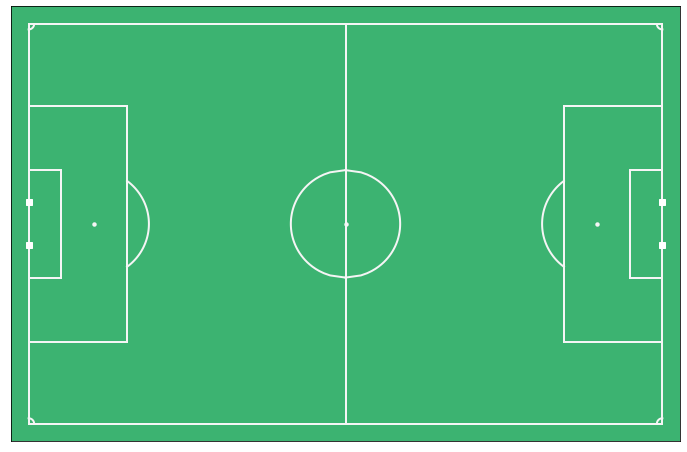

In [0]:
#figura, axis
fig, ax = mviz.plot_pitch()

En la siguiente líneas de comandos vamos a representar la posición donde ocurrió la jugada del jugador 10 cuando realizó el '**ON TARGET-GOAL**'.


In [0]:
#Esta línea permite ir al registro 198 donde tenemos la jugada del jugador 10
#Los campos Start X , Start Y nos indican las coordenadas donde se realizó la acción.
eventos_metros.loc[198]

Team                        Home
Type                        SHOT
Subtype           ON TARGET-GOAL
Period                         1
Start Frame                12202
Start Time [s]            488.08
End Frame                  12212
End Time [s]              488.48
From                    Player10
To                           NaN
Start X                    -47.7
Start Y                     -3.4
End X                     -54.06
End Y                      -2.04
Name: 198, dtype: object

-47.7
-3.400000000000003


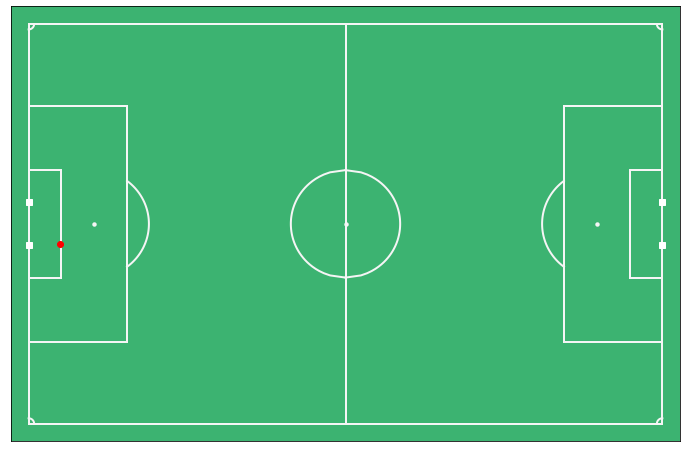

In [0]:
ejeX = eventos_metros.loc[198]['Start X']
ejeY = eventos_metros.loc[198]['Start Y']
print(ejeX)
print(ejeY)
ax.plot( ejeX,ejeY, 'ro' )
fig

También podemos dibujar toda la jugada, es decir donde empezó y donde terminó el disparo. **ax.annotate** es la función que permite dibujar sobre el campo de juego.

In [0]:
ax.annotate("shoot", xy=eventos_metros.loc[198][['End X','End Y']], xytext=eventos_metros.loc[198][['Start X','Start Y']], alpha=0.6, arrowprops=dict(arrowstyle="->",color='r'))

Text(-47.7, -3.400000000000003, 'shoot')

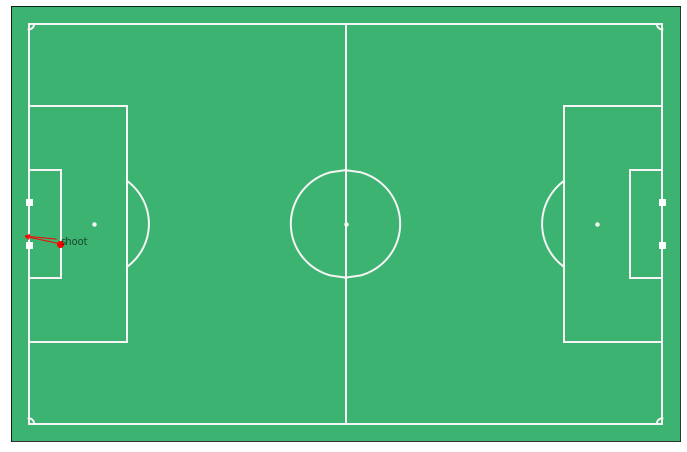

In [0]:
fig

Por último el archivo Metrica_Viz.py tiene funciones para dibujar en el campo secuencias de determinadas acciones, permitiendo el análisis de toda la jugada completa.

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe8625a7860>)

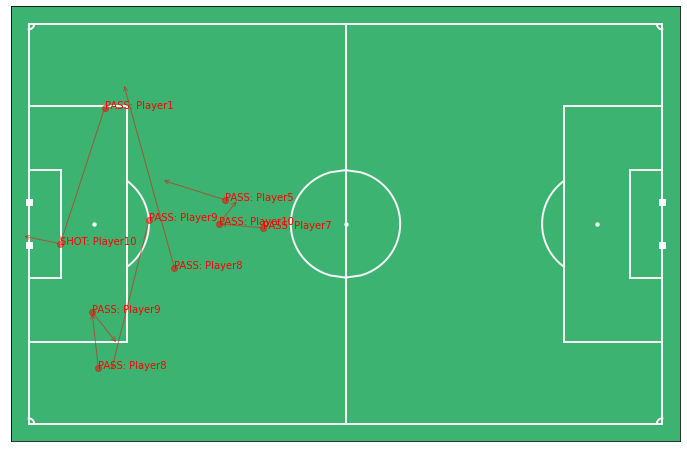

In [0]:
mviz.plot_events( eventos_metros.loc[190:198], indicators = ['Marker','Arrow'], annotate=True )

## Enlaces útiles



*   [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
*   [Soporte en python](https://www.tutorialspoint.com/python/)
*   [pandas.DataFrame.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)
*   [matplotlib.pyplot.annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html)

